In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
source = 'E:/Analytics Labs/python_CaseStudy/Python Foundation Case Study 4 - Python Visualization Case Study/'
SalesData = pd.read_csv(source+'SalesData.csv')
SalesData

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


### 1. Compare Sales by region for 2016 with 2015 using bar chart

In [3]:
grp_1 = SalesData.groupby(['Region'])[['Sales2015','Sales2016']].sum().reset_index()
grp_1

,Region,Sales2015,Sales2016
0,Central,7.891729e+06,9.787809e+06
1,East,9.512916e+06,1.266723e+07
2,West,5.349745e+06,7.209689e+06


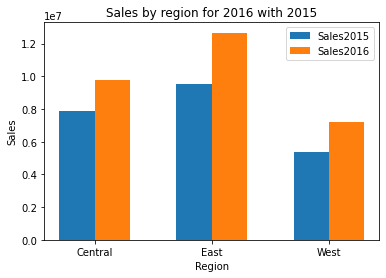

In [4]:
w=0.3

bar1 = np.arange(grp_1.shape[1])
bar2 = [i+w for i in bar1]

plt.bar(bar1, grp_1.Sales2015, width=w, label='Sales2015')
plt.bar(bar2, grp_1.Sales2016, width=w, label='Sales2016')

plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Sales by region for 2016 with 2015')
plt.legend()
plt.xticks(ticks = bar1+w/2 , labels=grp_1.Region )
plt.show()

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [19]:
grp_1

,Region,Sales2015,Sales2016
0,Central,7.891729e+06,9.787809e+06
1,East,9.512916e+06,1.266723e+07
2,West,5.349745e+06,7.209689e+06


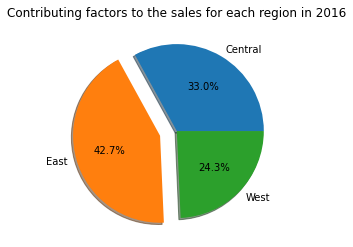

In [5]:
exp=[0,0.2,0]
plt.pie(grp_1.Sales2016 , 
        labels = grp_1.Region, 
        explode = exp ,
        shadow=True, 
        autopct= '%1.1f%%')
plt.title("Contributing factors to the sales for each region in 2016")
plt.show()

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [6]:
SalesData.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [7]:
gp_3 = SalesData.groupby(['Region','Tier'])[['Sales2015','Sales2016']].sum()
gp_3

Sales2015     Sales2016
Region  Tier                            
Central High  4.798698e+06  6.026043e+06
        Low   9.434397e+05  1.132833e+06
        Med   2.068226e+06  2.632181e+06
        Out   8.136489e+04 -3.248530e+03
East    High  6.102946e+06  7.817151e+06
        Low   9.016658e+05  1.144930e+06
        Med   2.470998e+06  3.705150e+06
        Out   3.730655e+04  0.000000e+00
West    High  2.944789e+06  3.768038e+06
        Low   6.710644e+05  1.099502e+06
        Med   1.718476e+06  2.342149e+06
        Out   1.541508e+04  0.000000e+00

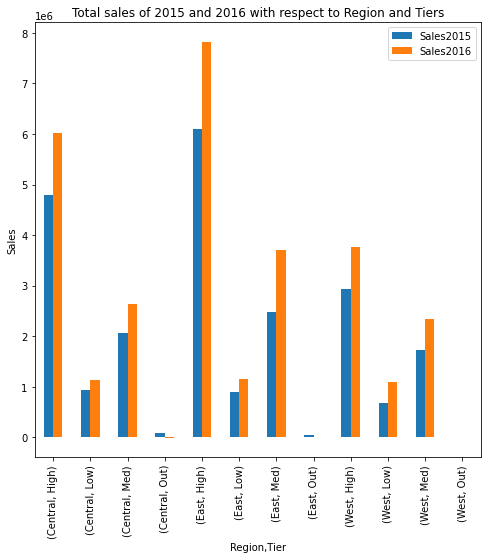

In [8]:
gp_3.plot(kind="bar",figsize=(8,8))
plt.ylabel("Sales")
plt.title("Total sales of 2015 and 2016 with respect to Region and Tiers")
plt.show()

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [9]:
gp_5 = SalesData.loc[SalesData.Region == 'East',:].groupby(['State'])[['Sales2015','Sales2016']].sum()
gp_5

,Sales2015,Sales2016
State,,
CT,197202.790,323502.31
DC,216723.950,257421.69
FL,1660162.000,2508232.28
GA,681546.460,946919.77
MA,419278.750,687096.45
MD,527309.060,750008.79
ME,77425.640,183673.05
NC,1292801.640,1610521.00
NH,136419.380,144717.51


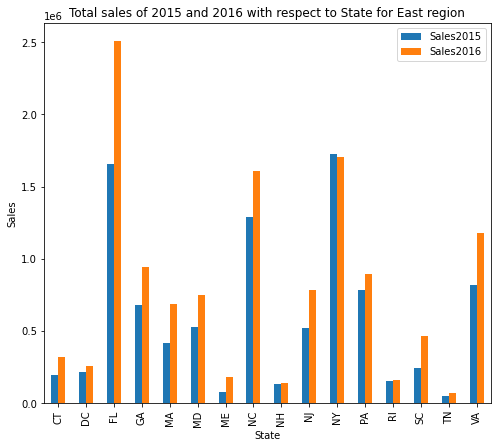

In [10]:
gp_5.plot(kind='bar', figsize=(8,7))
plt.ylabel("Sales")
plt.title("Total sales of 2015 and 2016 with respect to State for East region")
plt.show()

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

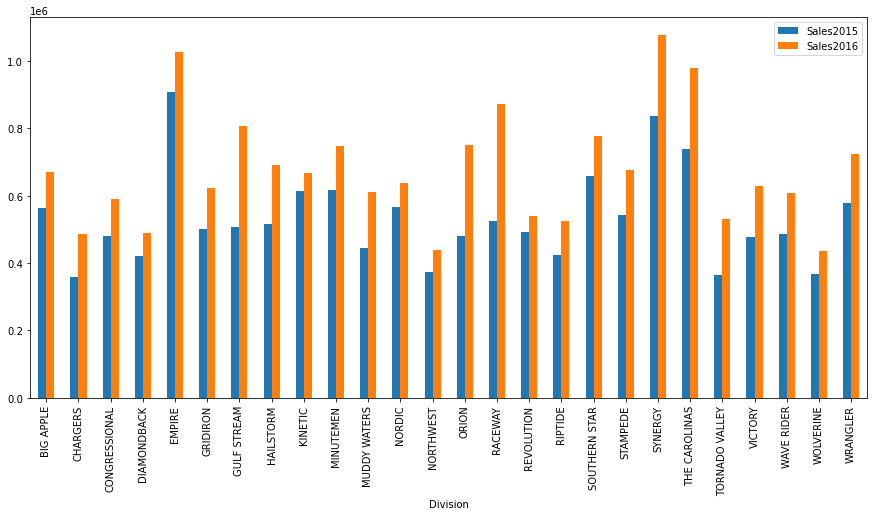

In [11]:
SalesData.loc[SalesData.Tier =='High'].groupby(['Division'])[['Sales2015','Sales2016']].sum().plot(kind='bar',figsize = (15,7))
plt.show()

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
• Jan - Mar : Q1

• Apr - Jun : Q2

• Jul - Sep : Q3

• Oct - Dec : Q4 

In [12]:
SalesData.Month.unique()

array(['Aug', 'Oct', 'Jun', 'Mar', 'Sep', 'Jul', 'Feb', 'Apr', 'Nov',
       'May', 'Dec', 'Jan'], dtype=object)

In [13]:
SalesData['Qtr'] = np.where(SalesData.Month.isin(['Jan','Feb','Mar']), 'Q1',
                         np.where(SalesData.Month.isin(['Apr','May','Jun']), 'Q2',
                                 np.where(SalesData.Month.isin(['Jul','Aug','Sep']),'Q3',
                                         np.where(SalesData.Month.isin(['Oct','Nov','Dec']),'Q4',np.NAN)
                                         )
                                 ) 
                        )
SalesData

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

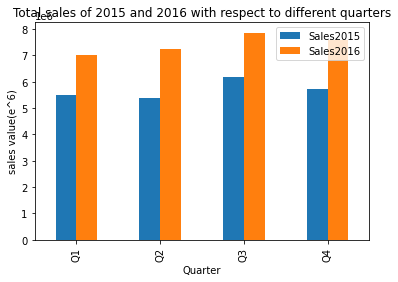

In [14]:
SalesData.groupby(['Qtr'])[['Sales2015','Sales2016']].agg('sum').plot(kind = 'bar')
plt.ylabel('sales value(e^6)')
plt.xlabel('Quarter')
plt.title('Total sales of 2015 and 2016 with respect to different quarters')
plt.show()

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
(Draw 4 pie charts representing a Quarter for each Tier)

In [20]:
#grouping the data based on "Qtr" and "Tier" to find total sales in 2016
qtr_pivot = SalesData.pivot_table(index='Qtr',
                                  columns='Tier',
                                  values='Sales2016',
                                  aggfunc = 'sum').T.reset_index()
qtr_pivot

Qtr,Tier,Q1,Q2,Q3,Q4
0,High,3867718.595,4.130953e+06,4.872559e+06,4.740002e+06
1,Low,948832.770,8.905948e+05,7.951777e+05,7.426594e+05
2,Med,2181401.879,2.215814e+06,2.197058e+06,2.085207e+06
3,Out,0.000,0.000000e+00,-3.248530e+03,0.000000e+00


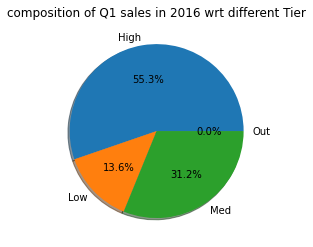

In [22]:
plt.pie(qtr_pivot.Q1 , 
        labels = qtr_pivot.Tier,
        shadow=True, 
        autopct= '%1.1f%%')
plt.title("Composition of Q1 sales in 2016 wrt different Tier")
plt.show()

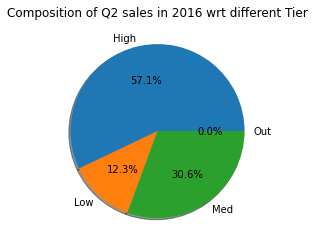

In [23]:
plt.pie(qtr_pivot.Q2 , 
        labels = qtr_pivot.Tier,
        shadow=True, 
        autopct= '%1.1f%%')
plt.title("Composition of Q2 sales in 2016 wrt different Tier")
plt.show()

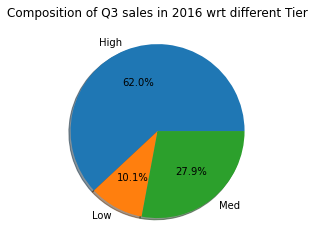

In [26]:
# Since the negative sales cannot be shown on the pie chart, we are deleting the Out Tier
qtr_pivot.drop(3,inplace= True)
plt.pie(qtr_pivot.Q3 , 
        labels = qtr_pivot.Tier,
        shadow=True, 
        autopct= '%1.1f%%')
plt.title("Composition of Q3 sales in 2016 wrt different Tier")
plt.show()

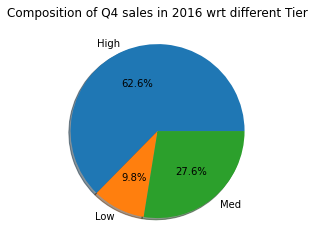

In [27]:
plt.pie(qtr_pivot.Q4 , 
        labels = qtr_pivot.Tier,
        shadow=True, 
        autopct= '%1.1f%%')
plt.title("Composition of Q4 sales in 2016 wrt different Tier")
plt.show()